In [2]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

import numpy as np
import matplotlib.pyplot as plt

from matplotlib import style
style.use('ggplot') or plt.style.use('ggplot')

In [3]:
K = 4 
X, y = make_blobs(n_samples = 100, centers = K, cluster_std = 1.5)

In [4]:
model = KMeans(n_clusters = K, init = 'random', n_init = 5, max_iter = 50)

In [6]:
model.fit(X) # passing in only X because K means clustering is unsupervised

KMeans(init='random', max_iter=50, n_clusters=4, n_init=5)

In [9]:
clusters = model.cluster_centers_ # gives us cluster centers

In [10]:
labels = model.labels_ 

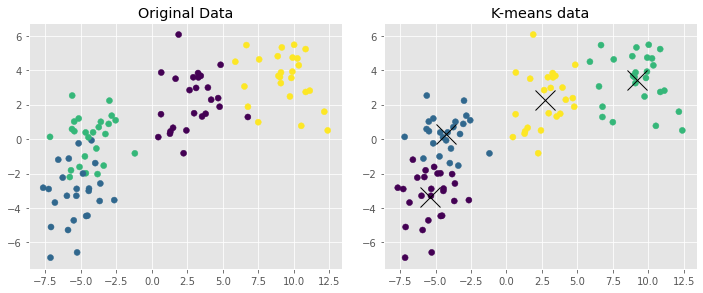

In [11]:
plt.subplots(nrows = 1, ncols = 2, figsize = (10, 4)) # compare graphs side by side - K means vs original data
plt.tight_layout()
plt.subplot(1, 2, 1)
plt.title('Original Data')
plt.scatter(X[:, 0], X[:, 1], c = y)

plt.subplot(1, 2, 2)
plt.title("K-means data")
plt.scatter(X[:, 0], X[:, 1], c = labels)
plt.scatter(clusters[:, 0], clusters[:, 1], marker = "x", s = 400, linewidth = 1, c = "black", zorder = 100)

plt.show()

In [12]:
# choosing the value for K by measuring the variance of the distance between points and the cluster
# previous code block had hard coded a K value

mi = []

for i in range(1, 10): # guess for how many clusters needed
    m = KMeans(n_clusters = i, init = 'random', n_init = 5, max_iter = 5)
    m.fit(X)
    mi.append([i, 1 - m.inertia_]) # from sklean docs, intertia is variance
    # 1 - var because we are interested in graphing the reduction of variation to find K
mi = np.array(mi) 

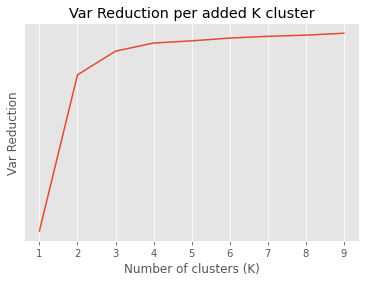

In [13]:
axes = plt.axes() 

axes.plot(mi[:, 0], mi[:, 1])

plt.title('Var Reduction per added K cluster')
axes.set_ylabel('Var Reduction')
axes.set_yticks([])
axes.set_xlabel('Number of clusters (K)')


plt.show()

# from here, we can see that K = 3 is the optimal value, added on extra Ks is diminishing returns


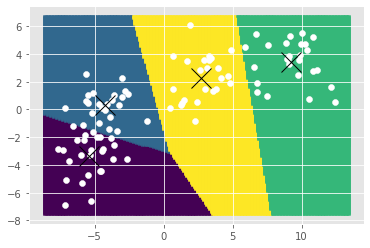

In [14]:
# lets examine what regions of the graph will get you to what cluster

axes = plt.axes() 
plt.scatter(X[:, 0], X[:, 1], c = 'white')
plt.scatter(clusters[:, 0], clusters[:, 1], marker = "x", s = 400, linewidth = 1, c = "black", zorder = 100)

#create a 2D grid of points to evaluate 
xlim = axes.get_xlim()
ylim = axes.get_ylim() 
xx = np.linspace(xlim[0], xlim[1], 200)
yy = np.linspace(ylim[0], ylim[1], 200)
YY, XX = np.meshgrid(yy, xx)

xy = np.vstack([XX.ravel(), YY.ravel()]).T

z = model.predict(xy)

axes.scatter(xy[:, 0], xy[:, 1], marker = "s", c = z, s = 5, zorder = -10)
plt.show()